## Import library yang diperlukan

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.ticker as ticker
import folium
import geopy
#from folium.plugins import MarketCluster
from geopy.exc import GeocoderTimedOut
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from geopy.geocoders import Nominatim

## Load dataset

In [166]:
country_df = pd.read_csv("https://raw.githubusercontent.com/arvin0711/COVID-19-World-Vaccination-Progress/main/dataset/country_vaccinations.csv")
country_df.head()

country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             0.0                            0.0   
1                             NaN                            NaN   
2                             NaN                            NaN   
3                             NaN                            NaN   
4                             NaN                            NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  NaN                             NaN   
1                                  NaN                            34.0   
2                                  NaN                            34.0   
3                                  NaN                            34.0   
4                                  NaN                            34.0   

                                            vaccines  \
0  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
2  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
3  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
4  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   

                 source_name            source_website  
0  World Health Organization  https://covid19.who.int/  
1  World Health Organization  https://covid19.who.int/  
2  World Health Organization  https://covid19.who.int/  
3  World Health Organization  https://covid19.who.int/  
4  World Health Organization  https://covid19.who.int/

In [167]:
manufacture_df = pd.read_csv("https://raw.githubusercontent.com/arvin0711/COVID-19-World-Vaccination-Progress/main/dataset/country_vaccinations_by_manufacturer.csv")
manufacture_df.head()

location        date             vaccine  total_vaccinations
0  Argentina  2020-12-29             Moderna                   2
1  Argentina  2020-12-29  Oxford/AstraZeneca                   3
2  Argentina  2020-12-29   Sinopharm/Beijing                   1
3  Argentina  2020-12-29           Sputnik V               20481
4  Argentina  2020-12-30             Moderna                   2

## Assessing / Menilai Data

### Assessing dataset 1

In [168]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_milli

In [169]:
country_df.isna().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

Berdasarkan data di atas masih terdapat banyak missing value. Mengingat masih banyaknya missing value, kita tidak boleh langsung menghapus / drop missing value tsb krn akan menyebabkan banyak informasi penting ayng hilang. Cara yang tepat untuk menangani hal ini adalah mengisi semua missing value dengan nilai "0" untuk semua kolom. Hal ini akan kita bersihkan pada tahap cleaning data

In [170]:
country_df.duplicated().sum()

0

In [171]:
country_df.describe()

total_vaccinations  people_vaccinated  people_fully_vaccinated  \
count        4.360700e+04       4.129400e+04             3.880200e+04   
mean         4.592964e+07       1.770508e+07             1.413830e+07   
std          2.246004e+08       7.078731e+07             5.713920e+07   
min          0.000000e+00       0.000000e+00             1.000000e+00   
25%          5.264100e+05       3.494642e+05             2.439622e+05   
50%          3.590096e+06       2.187310e+06             1.722140e+06   
75%          1.701230e+07       9.152520e+06             7.559870e+06   
max          3.263129e+09       1.275541e+09             1.240777e+09   

       daily_vaccinations_raw  daily_vaccinations  \
count            3.536200e+04        8.621300e+04   
mean             2.705996e+05        1.313055e+05   
std              1.212427e+06        7.682388e+05   
min              0.000000e+00        0.000000e+00   
25%              4.668000e+03        9.000000e+02   
50%              2.530900e+04        7.343000e+03   
75%              1.234925e+05        4.409800e+04   
max              2.474100e+07        2.242429e+07   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
count                    43607.000000                   41294.000000   
mean                        80.188543                      40.927317   
std                         67.913577                      29.290759   
min                          0.000000                       0.000000   
25%                         16.050000                      11.370000   
50%                         67.520000                      41.435000   
75%                        132.735000                      67.910000   
max                        345.370000                     124.760000   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  
count                         38802.000000                    86213.000000  
mean                             35.523243                     3257.049157  
std                              28.376252                     3934.312440  
min                               0.000000                        0.000000  
25%                               7.020000                      636.000000  
50%                              31.750000                     2050.000000  
75%                              62.080000                     4682.000000  
max                             122.370000                   117497.000000

### Assessing dataset 2

In [172]:
manufacture_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35623 entries, 0 to 35622
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            35623 non-null  object
 1   date                35623 non-null  object
 2   vaccine             35623 non-null  object
 3   total_vaccinations  35623 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [173]:
manufacture_df.isna().sum()

location              0
date                  0
vaccine               0
total_vaccinations    0
dtype: int64

dataset kedua sudah tidak ada nilai null artinya sudah bisa dianalisis

In [174]:
country_df.describe()

total_vaccinations  people_vaccinated  people_fully_vaccinated  \
count        4.360700e+04       4.129400e+04             3.880200e+04   
mean         4.592964e+07       1.770508e+07             1.413830e+07   
std          2.246004e+08       7.078731e+07             5.713920e+07   
min          0.000000e+00       0.000000e+00             1.000000e+00   
25%          5.264100e+05       3.494642e+05             2.439622e+05   
50%          3.590096e+06       2.187310e+06             1.722140e+06   
75%          1.701230e+07       9.152520e+06             7.559870e+06   
max          3.263129e+09       1.275541e+09             1.240777e+09   

       daily_vaccinations_raw  daily_vaccinations  \
count            3.536200e+04        8.621300e+04   
mean             2.705996e+05        1.313055e+05   
std              1.212427e+06        7.682388e+05   
min              0.000000e+00        0.000000e+00   
25%              4.668000e+03        9.000000e+02   
50%              2.530900e+04        7.343000e+03   
75%              1.234925e+05        4.409800e+04   
max              2.474100e+07        2.242429e+07   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
count                    43607.000000                   41294.000000   
mean                        80.188543                      40.927317   
std                         67.913577                      29.290759   
min                          0.000000                       0.000000   
25%                         16.050000                      11.370000   
50%                         67.520000                      41.435000   
75%                        132.735000                      67.910000   
max                        345.370000                     124.760000   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  
count                         38802.000000                    86213.000000  
mean                             35.523243                     3257.049157  
std                              28.376252                     3934.312440  
min                               0.000000                        0.000000  
25%                               7.020000                      636.000000  
50%                              31.750000                     2050.000000  
75%                              62.080000                     4682.000000  
max                             122.370000                   117497.000000

In [175]:
manufacture_df.describe()

total_vaccinations
count        3.562300e+04
mean         1.508357e+07
std          5.181768e+07
min          0.000000e+00
25%          9.777600e+04
50%          1.305506e+06
75%          7.932423e+06
max          6.005200e+08

## Cleaning Data

### Membersihkan dataset 1

Menangani Null Value

In [176]:
country_df.fillna(value = 0, inplace = True)

Mengganti tipe data

In [177]:
country_df.total_vaccinations = country_df.total_vaccinations.astype(int)
country_df.people_vaccinated = country_df.people_vaccinated.astype(int)
country_df.people_fully_vaccinated = country_df.people_fully_vaccinated.astype(int)
country_df.daily_vaccinations_raw = country_df.daily_vaccinations_raw.astype(int)
country_df.daily_vaccinations = country_df.daily_vaccinations.astype(int)
country_df.total_vaccinations_per_hundred = country_df.total_vaccinations_per_hundred.astype(int)
country_df.people_fully_vaccinated_per_hundred = country_df.people_fully_vaccinated_per_hundred.astype(int)
country_df.daily_vaccinations_per_million = country_df.daily_vaccinations_per_million.astype(int)
country_df.people_vaccinated_per_hundred = country_df.people_vaccinated_per_hundred.astype(int)
country_df['date']= pd.to_datetime(country_df['date'])

Membuang kolom yang tidak diperlukan

In [178]:
country_df.drop(['source_name','source_website'], inplace=True, axis=1)

In [179]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              86512 non-null  object        
 1   iso_code                             86512 non-null  object        
 2   date                                 86512 non-null  datetime64[ns]
 3   total_vaccinations                   86512 non-null  int64         
 4   people_vaccinated                    86512 non-null  int64         
 5   people_fully_vaccinated              86512 non-null  int64         
 6   daily_vaccinations_raw               86512 non-null  int64         
 7   daily_vaccinations                   86512 non-null  int64         
 8   total_vaccinations_per_hundred       86512 non-null  int64         
 9   people_vaccinated_per_hundred        86512 non-null  int64         
 10  people_ful

In [180]:
country_df.isna().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
dtype: int64

### Membersihkan dataset 2

Mengganti tipe data

In [181]:
manufacture_df['date']= pd.to_datetime(country2_df['date'])

In [182]:
manufacture_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35623 entries, 0 to 35622
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   location            35623 non-null  object        
 1   date                35623 non-null  datetime64[ns]
 2   vaccine             35623 non-null  object        
 3   total_vaccinations  35623 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.1+ MB


## Exploratory Data Analysis and Visualization

### Menentukan Pertanyaan Bisnis


Where are vaccinated more people per day? But in terms of percent from entire population ?

1. Vaksin yang paling banyak digunakan?


In [183]:
recent_date=country_df[country_df['date']=='2021-02-17']

vacc_ordered= recent_date['vaccines'].str.get_dummies(sep=', ').sum().sort_values(ascending=False).reset_index()
vacc_ordered.columns = ['Vaccine', 'Number of Countries']
print(vacc_ordered)

               Vaccine  Number of Countries
0      Pfizer/BioNTech                   99
1   Oxford/AstraZeneca                   92
2              Moderna                   60
3      Johnson&Johnson                   48
4    Sinopharm/Beijing                   38
5            Sputnik V                   30
6              Sinovac                   24
7              Novavax                   10
8              CanSino                    6
9              Covaxin                    4
10          Soberana02                    2
11       Sputnik Light                    2
12     Sinopharm/Wuhan                    2
13              Abdala                    1
14            Turkovac                    1
15            SpikoGen                    1
16              QazVac                    1
17       Razi Cov Pars                    1
18     COVIran Barekat                    1
19           FAKHRAVAC                    1
20        EpiVacCorona                    1
21              ZF2001          

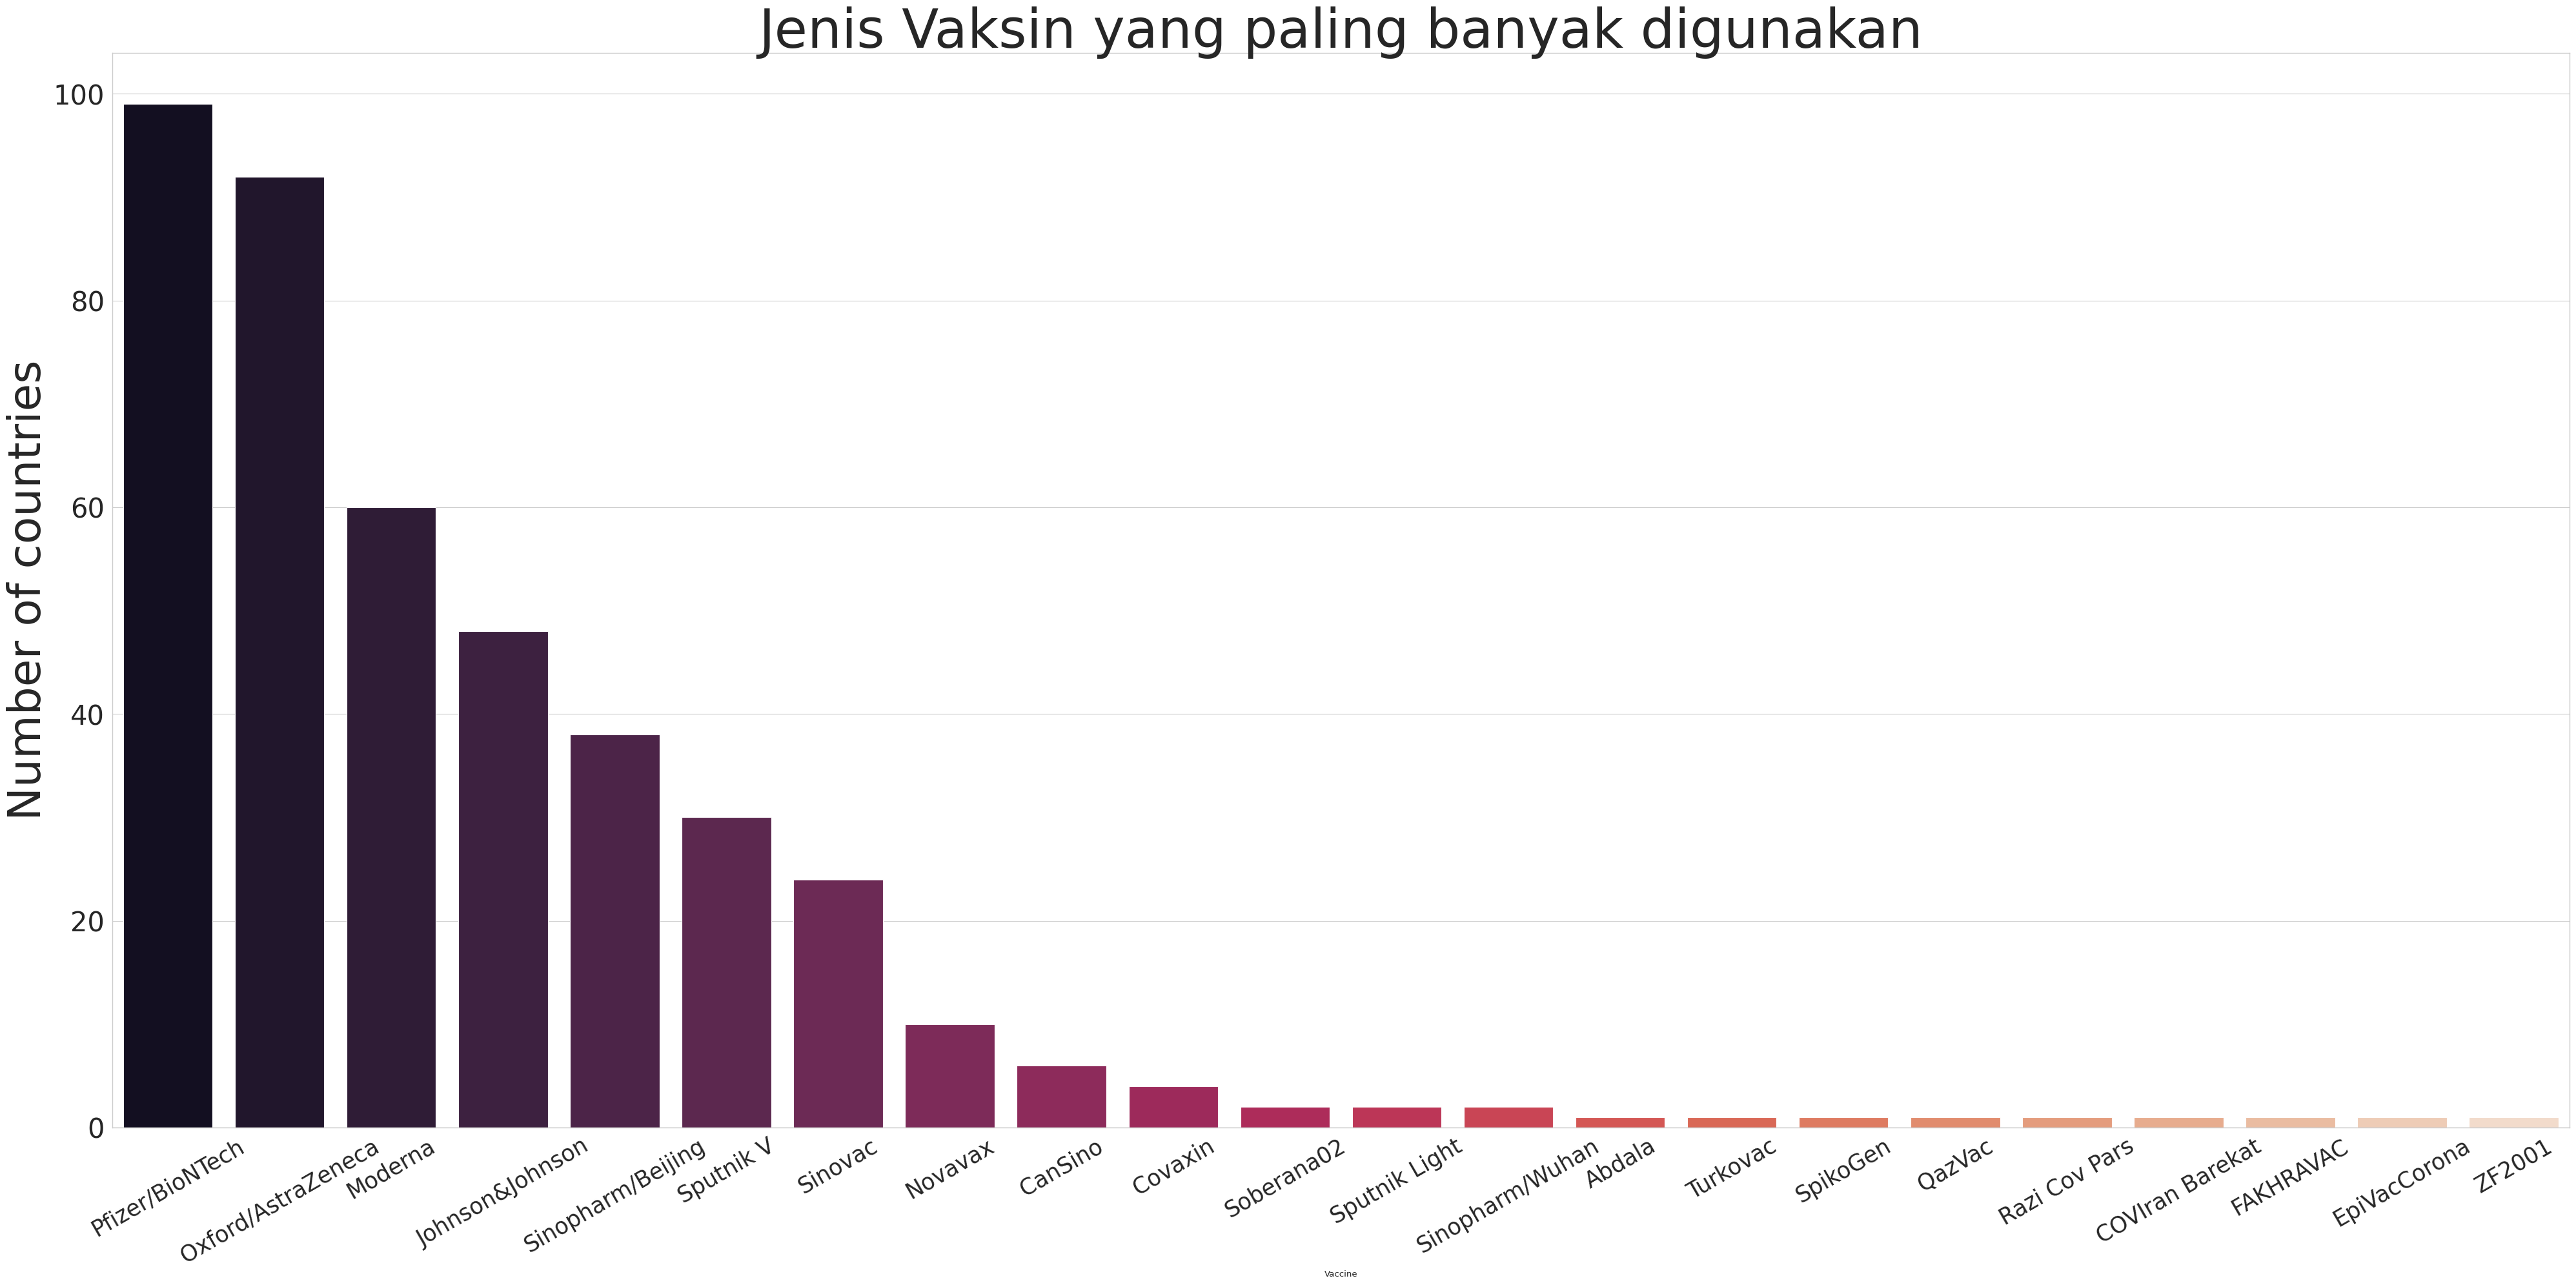

In [184]:
sns.set_style("whitegrid")
sns.set_context("paper")
f, ax = plt.subplots(figsize=(40,20))

sns.barplot(x='Vaccine', y='Number of Countries', data=vacc_ordered, palette='rocket')
ax.set_title("Jenis Vaksin yang paling banyak digunakan", fontsize=60)
ax.set_ylabel("Number of countries", fontsize=50)
plt.tick_params(axis='x', labelsize=25)

plt.xticks(rotation=30)
plt.yticks(fontsize=30)
plt.tight_layout()

plt.show()

2. Negara mana saja yang telah melakukan banyak vaksinasi?

In [185]:
total_vacc = country_df.groupby(['country', 'iso_code', 'vaccines'])['total_vaccinations'].sum().reset_index()

vacc_top_10_country = total_vacc[['country', 'vaccines', 'total_vaccinations']].sort_values(by='total_vaccinations', ascending=False).reset_index(drop=True).head(10)
vacc_top_10_country

country                                           vaccines  \
0           China  CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...   
1           India             Covaxin, Oxford/AstraZeneca, Sputnik V   
2   United States          Johnson&Johnson, Moderna, Pfizer/BioNTech   
3          Brazil  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
4       Indonesia  Johnson&Johnson, Moderna, Novavax, Oxford/Astr...   
5         Germany  Johnson&Johnson, Moderna, Novavax, Oxford/Astr...   
6  United Kingdom       Moderna, Oxford/AstraZeneca, Pfizer/BioNTech   
7          Turkey                 Pfizer/BioNTech, Sinovac, Turkovac   
8          France  Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...   
9         England       Moderna, Oxford/AstraZeneca, Pfizer/BioNTech   

   total_vaccinations  
0        709452663700  
1        323440305798  
2        155013867208  
3         79067174395  
4         45214622016  
5         38982830332  
6         36851641768  
7         33923100933  
8         32177039372  
9         31037114023

<ipython-input-186-c5f0820ad70b>:14: UserWarning:

FixedFormatter should only be used together with FixedLocator



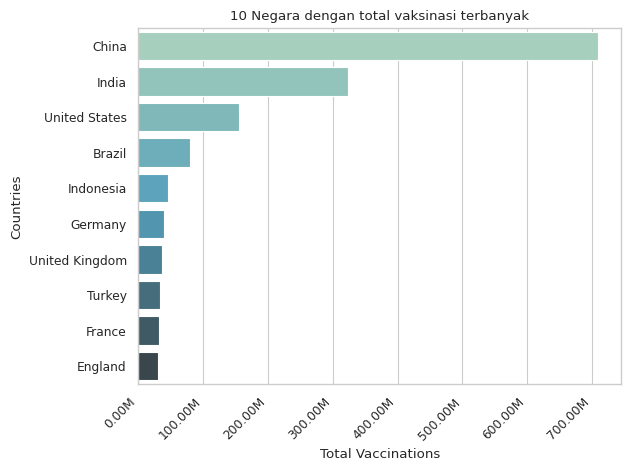

In [186]:
# seaborn Bar plot and customization
sns.set_style('whitegrid')
sns.set_context('paper')
f, ax = plt.subplots(1,1)

ax = sns.barplot(y='country', x='total_vaccinations', data=vacc_top_10_country, palette='GnBu_d')
ax.set_xlabel('Total Vaccinations')
ax.set_ylabel('Countries')
ax.set_title('10 Negara dengan total vaksinasi terbanyak')

# change the x axis ticks format (eg. 7000000 is transformed into 70M)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.2f}'.format(x/1000000000)+ 'M'))

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# Show the plot
plt.tight_layout()
plt.show()

In [187]:
country_df.head(100)

country iso_code       date  total_vaccinations  people_vaccinated  \
0   Afghanistan      AFG 2021-02-22                   0                  0   
1   Afghanistan      AFG 2021-02-23                   0                  0   
2   Afghanistan      AFG 2021-02-24                   0                  0   
3   Afghanistan      AFG 2021-02-25                   0                  0   
4   Afghanistan      AFG 2021-02-26                   0                  0   
..          ...      ...        ...                 ...                ...   
95  Afghanistan      AFG 2021-05-28                   0                  0   
96  Afghanistan      AFG 2021-05-29                   0                  0   
97  Afghanistan      AFG 2021-05-30              600152             480226   
98  Afghanistan      AFG 2021-05-31                   0                  0   
99  Afghanistan      AFG 2021-06-01                   0                  0   

    people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                         0                       0                   0   
1                         0                       0                1367   
2                         0                       0                1367   
3                         0                       0                1367   
4                         0                       0                1367   
..                      ...                     ...                 ...   
95                        0                       0                5907   
96                        0                       0                5326   
97                   119926                       0                4746   
98                        0                       0                5084   
99                        0                       0                5102   

    total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                                0                              0   
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                0                              0   
..                             ...                            ...   
95                               0                              0   
96                               0                              0   
97                               1                              1   
98                               0                              0   
99                               0                              0   

    people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                     0                               0   
1                                     0                              34   
2                                     0                              34   
3                                     0                              34   
4                                     0                              34   
..                                  ...                             ...   
95                                    0                             148   
96                                    0                             134   
97                                    0                             119   
98                                    0                             128   
99                                    0                             128   

                                             vaccines  
0   Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
1   Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
2   Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
3   Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
4   Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
..                                                ...  
95  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/

In [188]:
manufacture_df.head()

location       date             vaccine  total_vaccinations
0  Argentina 2020-12-29             Moderna                   2
1  Argentina 2020-12-29  Oxford/AstraZeneca                   3
2  Argentina 2020-12-29   Sinopharm/Beijing                   1
3  Argentina 2020-12-29           Sputnik V               20481
4  Argentina 2020-12-30             Moderna                   2

3. Negara manakah yang orang-orangnya telah divaksin secara full masih sedikit?


In [189]:
full_vacc = country_df.groupby(['country', 'iso_code', 'vaccines'])['people_fully_vaccinated'].sum().reset_index()

full_vacc_lowest_10_country = full_vacc[['country', 'vaccines', 'people_fully_vaccinated']].sort_values(by='people_fully_vaccinated', ascending=True).reset_index(drop=True).head(10)
full_vacc_lowest_10_country

country                  vaccines  \
0                         Pitcairn        Oxford/AstraZeneca   
1                          Tokelau           Pfizer/BioNTech   
2                 Falkland Islands        Oxford/AstraZeneca   
3                             Niue           Pfizer/BioNTech   
4                     Saint Helena        Oxford/AstraZeneca   
5                           Tuvalu        Oxford/AstraZeneca   
6  Bonaire Sint Eustatius and Saba  Moderna, Pfizer/BioNTech   
7                            Nauru        Oxford/AstraZeneca   
8                       Montserrat        Oxford/AstraZeneca   
9                          Burundi         Sinopharm/Beijing   

   people_fully_vaccinated  
0                      113  
1                      968  
2                     3492  
3                     3887  
4                     4653  
5                    17362  
6                    18401  
7                    41357  
8                    41500  
9                    82190

<ipython-input-190-6f89632f422e>:13: UserWarning:

FixedFormatter should only be used together with FixedLocator



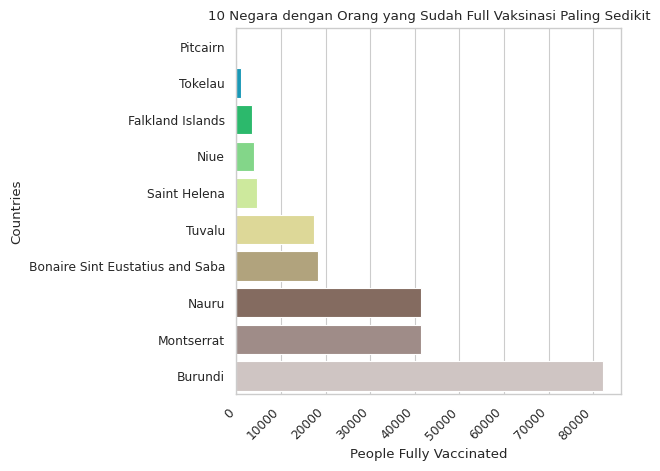

In [190]:
# seaborn Bar plot and customization
sns.set_style('whitegrid')
sns.set_context('paper')
f, ax = plt.subplots(1,1)

ax = sns.barplot(y='country', x='people_fully_vaccinated', data=full_vacc_lowest_10_country, palette='terrain')
ax.set_xlabel('People Fully Vaccinated')
ax.set_ylabel('Countries')
ax.set_title('10 Negara dengan Orang yang Sudah Full Vaksinasi Paling Sedikit')



ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# Show the plot
plt.tight_layout()
plt.show()

4. Perusahaan Manufaktur mana yang produk vaksinnya paling banyak digunakan?

In [191]:
manufacture_total_vacc= manufacture_df.groupby([ 'vaccine'])['total_vaccinations'].sum().reset_index()

most_total_vaccinnations = manufacture_total_vacc[['vaccine','total_vaccinations']].sort_values(by='total_vaccinations', ascending=False).reset_index(drop=True).head(10)
most_total_vaccinnations

vaccine  total_vaccinations
0     Pfizer/BioNTech        344835955037
1             Moderna        103072147621
2  Oxford/AstraZeneca         46451509497
3             Sinovac         13407163275
4     Johnson&Johnson         12611375881
5   Sinopharm/Beijing         10877006517
6           Sputnik V          5787343199
7             CanSino           271397675
8             Novavax             8268113
9             Covaxin                3572

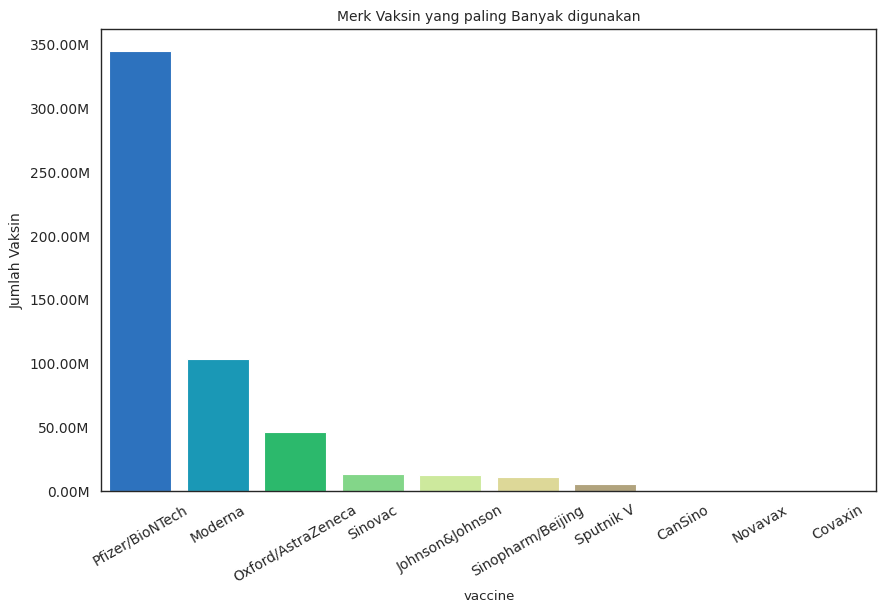

In [192]:
sns.set_style("white")
sns.set_context("paper")
f, ax = plt.subplots(figsize=(10,6))

sns.barplot(x='vaccine', y='total_vaccinations', data=most_total_vaccinnations, palette='terrain')
ax.set_title('Merk Vaksin yang paling Banyak digunakan', fontsize=10)
ax.set_ylabel('Jumlah Vaksin', fontsize=10)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.2f}'.format(x/1000000000)+ 'M'))

plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

plt.xticks(rotation=30)



plt.show()

In [193]:
country_df

country iso_code       date  total_vaccinations  people_vaccinated  \
0      Afghanistan      AFG 2021-02-22                   0                  0   
1      Afghanistan      AFG 2021-02-23                   0                  0   
2      Afghanistan      AFG 2021-02-24                   0                  0   
3      Afghanistan      AFG 2021-02-25                   0                  0   
4      Afghanistan      AFG 2021-02-26                   0                  0   
...            ...      ...        ...                 ...                ...   
86507     Zimbabwe      ZWE 2022-03-25             8691642            4814582   
86508     Zimbabwe      ZWE 2022-03-26             8791728            4886242   
86509     Zimbabwe      ZWE 2022-03-27             8845039            4918147   
86510     Zimbabwe      ZWE 2022-03-28             8934360            4975433   
86511     Zimbabwe      ZWE 2022-03-29             9039729            5053114   

       people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                            0                       0                   0   
1                            0                       0                1367   
2                            0                       0                1367   
3                            0                       0                1367   
4                            0                       0                1367   
...                        ...                     ...                 ...   
86507                  3473523                  139213               69579   
86508                  3487962                  100086               83429   
86509                  3493763                   53311               90629   
86510                  3501493                   89321              100614   
86511                  3510256                  105369              103751   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                                   0                              0   
1                                   0                              0   
2                                   0                              0   
3                                   0                              0   
4                                   0                              0   
...                               ...                            ...   
86507                              57                             31   
86508                              58                             32   
86509                              58                             32   
86510                              59                             32   
86511                              59                             33   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                        0                               0   
1                                        0                              34   
2                                        0                              34   
3                                        0                              34   
4                                        0                              34   
...                                    ...                             ...   
86507                                   23                            4610   
86508                                   23                            5528   
86509                                   23                            6005   
86510                                   23                            6667   
86511                                   23                            6874   

                                                vaccines  
0      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
1      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
2      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
3      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
4   

5. Bagaimana Tren Vaksinasi Per Hari di seluruh Negara?

In [194]:
trend = country_df.groupby("date", as_index=False)["daily_vaccinations"].mean()

trend

date  daily_vaccinations
0   2020-12-02            0.000000
1   2020-12-03            0.000000
2   2020-12-04            0.000000
3   2020-12-05            0.000000
4   2020-12-06            0.000000
..         ...                 ...
478 2022-03-25       104597.388889
479 2022-03-26       138108.313131
480 2022-03-27       151252.780220
481 2022-03-28       173325.807229
482 2022-03-29       270936.296296

[483 rows x 2 columns]

In [195]:
fig = px.line(trend, x="date", y="daily_vaccinations")

fig.update_layout(
    title={
            'text' : "Daily vaccination trend",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Date",
    yaxis_title="Daily Vaccinations"
)
fig.show()

Daily Vaccinations Pada setiap negara

In [196]:
color_palette = px.colors.qualitative.Set1

fig = px.line(country_df, x = 'date', y ='daily_vaccinations', color = 'country',color_discrete_sequence=color_palette)
fig.update_layout(
    title={
            'text' : "Daily vaccination trend",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Date",
    yaxis_title="Daily Vaccinations"
)
fig.show()

6. Bagaimana Tren Total Vaksinasi Pada 5 negara teratas

In [223]:
country_df.groupby("country")["total_vaccinations"].mean().sort_values(ascending= False).head(10)

country
China             1.509474e+09
India             7.367661e+08
United States     3.291165e+08
Brazil            1.809317e+08
Indonesia         1.022955e+08
Germany           8.511535e+07
United Kingdom    8.318655e+07
Turkey            7.692313e+07
Japan             7.463578e+07
France            7.040928e+07
Name: total_vaccinations, dtype: float64

In [225]:
#creating dataframe for top 5 vaccinated countries
x= country_df.loc[(country_df.country== "China") | (country_df.country== "India")| (country_df.country== "United States")| (country_df.country== "Brazil")|(country_df.country== "Indonesia")]

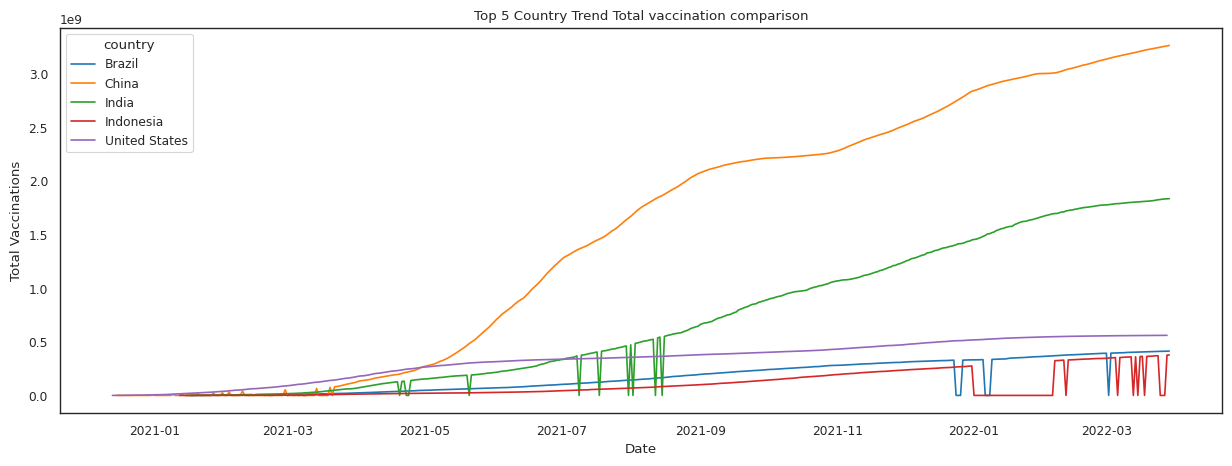

In [228]:
#total vaccination comparison
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "total_vaccinations" ,data= x,hue= "country")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.title("Top 5 Country Trend Total vaccination comparison")
plt.show()

NameError: ignored

In [234]:

trace = go.Choropleth(
            locations = country_df['country'],
            locationmode='country names',
            z = country_df['people_vaccinated'],
            text = country_df['country'],
            autocolorscale =False,
            reversescale = True,
            colorscale = 'viridis',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'People vaccinated',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'People vaccinated per country',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)
